# Método de la bisección

La raiz es:  0.9990234375
Se realizaron  11  iteraciones
La tabla de valores es: 
          xl   xu        xr  error_porcentual
0  -1.000000  1.0  0.000000          1.100000
1   0.000000  1.0  0.500000        100.000000
2   0.500000  1.0  0.750000         33.333333
3   0.750000  1.0  0.875000         14.285714
4   0.875000  1.0  0.937500          6.666667
5   0.937500  1.0  0.968750          3.225806
6   0.968750  1.0  0.984375          1.587302
7   0.984375  1.0  0.992188          0.787402
8   0.992188  1.0  0.996094          0.392157
9   0.996094  1.0  0.998047          0.195695
10  0.998047  1.0  0.999023          0.097752


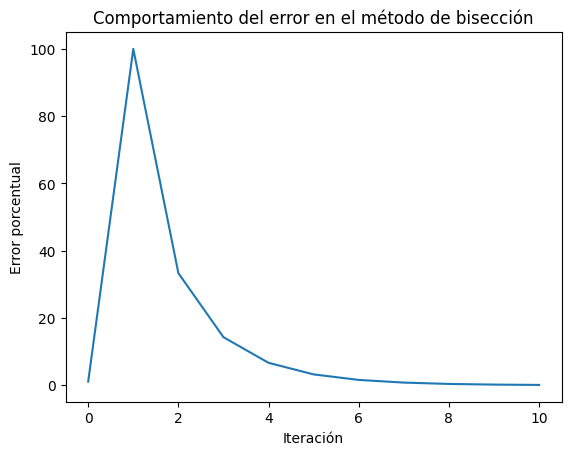

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


def f(x):
  #return 3*x**2 - 120*x + 100
  return x**2-2

def biseccion(f, xl, xu, error):
  results = pd.DataFrame(columns=['xl', 'xu', 'xr', 'error_porcentual'])
  iteraciones = 0

  # Segun la formula del libro
  # el error relativo porcentual
  # es |(xr nuevo - xr viejo)/xr nuevo| * 100
  error_relativo_porcentual = abs(error) + 1  # Inicializar con un valor mayor que el error
  xr = 0

  while error_relativo_porcentual > error:
    # Calcular el error relativo porcentual
    xrnuevo = (xl + xu)/2

    if iteraciones > 0:
      error_relativo_porcentual = abs((xrnuevo - xr) / xrnuevo) * 100

    xr = xrnuevo

    results.loc[len(results)] = [xl, xu, xr, error_relativo_porcentual]

    if f(xr) == 0:
      results.loc[len(results)] = [xl, xu, xr, 0]
      return xr, iteraciones, results
    elif f(xl)*f(xr) < 0:
      xu = xr
    else:
      xl = xr

    # Guardar los resultados de la iteracion
    iteraciones += 1


  return xr, iteraciones, results


xl = -1

xu = 1

error = 0.1


raiz, iteraciones, df = biseccion(f, xl, xu, error)

print("La raiz es: ", raiz)
print("Se realizaron ", iteraciones, " iteraciones")
print("La tabla de valores es: ")
print(df)

plt.plot(df['error_porcentual'])
plt.xlabel('Iteración')
plt.ylabel('Error porcentual')
plt.title('Comportamiento del error en el método de bisección')
plt.show()

# Metodo falsa posicion

La raiz es:  1.4143912465837514
Se realizaron  8  iteraciones
La tabla de valores es: 
          xl   xu         xr  error_porcentual
0  -2.000000  2.1 -22.000000        100.000000
1 -22.000000  2.1   2.221106       1090.497738
2   2.221106  2.1   1.542272         44.015129
3   1.542272  2.1   1.438325          7.226961
4   1.438325  2.1   1.418887          1.369973
5   1.418887  2.1   1.415124          0.265876
6   1.415124  2.1   1.414391          0.051829


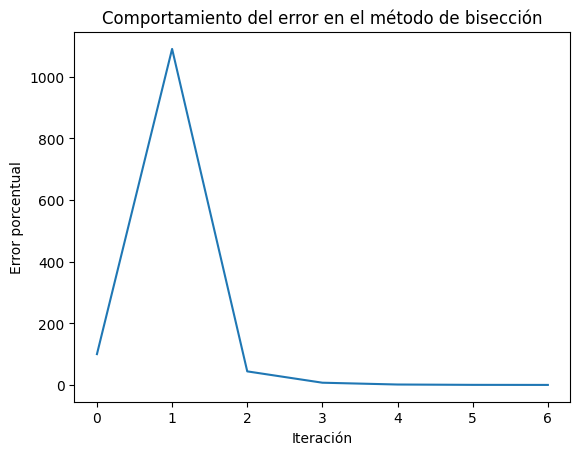

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


def f(x):
  #return 3*x**2 - 120*x + 100
  return x**2-2

def falsa_posicion(f, xl, xu, error):
  results = pd.DataFrame(columns=['xl', 'xu', 'xr', 'error_porcentual'])
  iteraciones = 0

  # Segun la formula del libro
  # el error relativo porcentual
  # es |(xr nuevo - xr viejo)/xr nuevo| * 100
  error_relativo_porcentual = abs(error) + 1  # Inicializar con un valor mayor que el error
  xr = 0

  while error_relativo_porcentual > error:
    # Calcular el error relativo porcentual

    if f(xl) - f(xu) == 0: 
      xu = xu + 0.1  # Ajustar xu para evitar división por cero
      iteraciones += 1
      continue

    xrnuevo = xu - ((f(xu)*(xl - xu))/(f(xl) - f(xu)))

    if iteraciones > 0:
      error_relativo_porcentual = abs((xrnuevo - xr) / xrnuevo) * 100

    xr = xrnuevo

    results.loc[len(results)] = [xl, xu, xr, error_relativo_porcentual]

    if f(xr) == 0:
      results.loc[len(results)] = [xl, xu, xr, 0]
      return xr, iteraciones, results
    elif f(xl)*f(xr) < 0:
      xu = xr
    else:
      xl = xr

    # Guardar los resultados de la iteracion
    iteraciones += 1


  return xr, iteraciones, results


xl = -2

xu = 2

error = 0.1


raiz, iteraciones, df = falsa_posicion(f, xl, xu, error)

print("La raiz es: ", raiz)
print("Se realizaron ", iteraciones, " iteraciones")
print("La tabla de valores es: ")
print(df)

plt.plot(df['error_porcentual'])
plt.xlabel('Iteración')
plt.ylabel('Error porcentual')
plt.title('Comportamiento del error en el método de bisección')
plt.show()

# Razón dorada

La raiz es:  -0.9990937922924308
Se realizaron  14  iteraciones
La tabla de valores es: 
     xl  f(xl)        xu  f(xu)        x1     f(x1)        x2     f(x2)  \
0  -1.0   -3.0  1.000000   -1.0  0.236068 -0.098301 -0.236068 -0.124612   
1  -1.0   -3.0  0.236068   -1.0 -0.236068 -0.124612 -0.527864 -0.704365   
2  -1.0   -3.0 -0.236068   -1.0 -0.527864 -0.704365 -0.708204 -1.358307   
3  -1.0   -3.0 -0.527864   -1.0 -0.708204 -1.358307 -0.819660 -1.894368   
4  -1.0   -3.0 -0.708204   -1.0 -0.819660 -1.894368 -0.888544 -2.280535   
5  -1.0   -3.0 -0.819660   -1.0 -0.888544 -2.280535 -0.931116 -2.541212   
6  -1.0   -3.0 -0.888544   -1.0 -0.931116 -2.541212 -0.957428 -2.710978   
7  -1.0   -3.0 -0.931116   -1.0 -0.957428 -2.710978 -0.973689 -2.819265   
8  -1.0   -3.0 -0.957428   -1.0 -0.973689 -2.819265 -0.983739 -2.887489   
9  -1.0   -3.0 -0.973689   -1.0 -0.983739 -2.887489 -0.989950 -2.930154   
10 -1.0   -3.0 -0.983739   -1.0 -0.989950 -2.930154 -0.993789 -2.956714   
11 -1.0   -

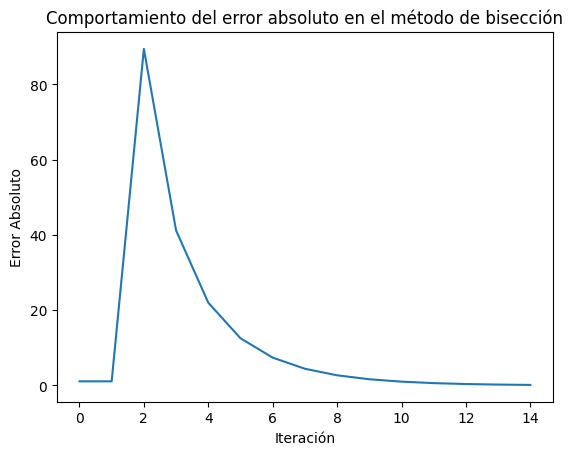

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import math


def f(x):
  #return 3*x**2 - 120*x + 100
  return x**3 -2*x**2


def razon_dorada(f, xl, xu, error, method = 'minimize'):
    results = pd.DataFrame(columns=['xl', 'f(xl)', 'xu', 'f(xu)', 'x1', 'f(x1)', 'x2', 'f(x2)', 'd', 'error_absoluto'])
    phi = (math.sqrt(5) - 1) / 2  # razón dorada conjugada
    iteraciones = 0 

    d = phi*(xu - xl)
    x1 = xl + d
    x2 = xu - d
    fx1 = f(x1)
    fx2 = f(x2)
    fxl = f(xl)
    fxu = f(xu)
    error_absoluto = abs(error) + 1

    results.loc[len(results)] = [xl, fxl, xu, fxu, x1, fx1, x2, fx2, d, error_absoluto]

    # Evaluación inicial
    if method == 'minimize':
        if fx1 < fx2:
            xopt = x1
        else:
            xopt = x2
    elif method == 'maximize':
        if fx1 > fx2:
            xopt = x1   
        else:
            xopt = x2
    else:
        raise ValueError("Método no reconocido")

    while error_absoluto > error:

        d = phi*d
        if method == 'minimize':
            if fx1 < fx2:
                xl = x2
                x2, fx2 = x1, fx1
                x1 = xl + d
                fx1 = f(x1)
            else:
                xu = x1
                x1, fx1 = x2, fx2
                x2 = xu - d
                fx2 = f(x2)

        elif method == 'maximize':
            if fx1 > fx2:   # Ojo, ahora es ">" para maximizar
                xl = x2
                x2, fx2 = x1, fx1
                x1 = xl + d
                fx1 = f(x1)
            else:
                xu = x1
                x1, fx1 = x2, fx2
                x2 = xu - d
                fx2 = f(x2)

        iteraciones += 1

        results.loc[len(results)] = [xl, fxl, xu, fxu, x1, fx1, x2, fx2, d, error_absoluto]

        # Selección de xopt depende del método
        if method == 'minimize':
            if fx1 < fx2:
                xopt = x1
            else:
                xopt = x2
        elif method == 'maximize':
            if fx1 > fx2:
                xopt = x1
            else:
                xopt = x2

        if xopt != 0:
            error_absoluto = (1-phi)*abs((xu - xl)/xopt)*100

    return xopt, iteraciones, results


xl = -1

xu = 1

error = 0.1

raiz, iteraciones, df = razon_dorada(f, xl, xu, error, method='minimize')

print("La raiz es: ", raiz)
print("Se realizaron ", iteraciones, " iteraciones")
print("La tabla de valores es: ")
print(df)

plt.plot(df['error_absoluto'])
plt.xlabel('Iteración')
plt.ylabel('Error Absoluto')
plt.title('Comportamiento del error absoluto en el método de bisección')
plt.show()


# Interpolacion cuadratica

El mínimo está en x = 1.3333588915329055
f(x) mínimo = -1.1851851838787257
Iteraciones realizadas: 9

Tabla de iteraciones:
         x0        x1        x2        x3       f(x3)  error_x0  error_x1  \
0 -1.000000  1.100000  2.000000 -4.500000 -131.625000  3.500000  5.600000   
1  1.100000 -4.500000  2.000000  1.727941   -0.812308  0.627941  6.227941   
2  1.100000  1.727941 -4.500000  1.473969   -1.142847  0.373969  0.253972   
3  1.727941  1.473969 -4.500000  1.798263   -0.652368  0.070321  0.324294   
4  1.727941  1.798263  1.473969  1.384055   -1.179909  0.343886  0.414208   
5  1.798263  1.384055  1.473969  1.351423   -1.184525  0.446840  0.032632   
6  1.384055  1.351423  1.473969  1.335731   -1.185174  0.048324  0.015692   
7  1.351423  1.335731  1.473969  1.334010   -1.185184  0.017413  0.001721   
8  1.335731  1.334010  1.473969  1.333435   -1.185185  0.002296  0.000575   
9  1.334010  1.333435  1.473969  1.333359   -1.185185  0.000651  0.000076   

   error_x2  error_min  
0  

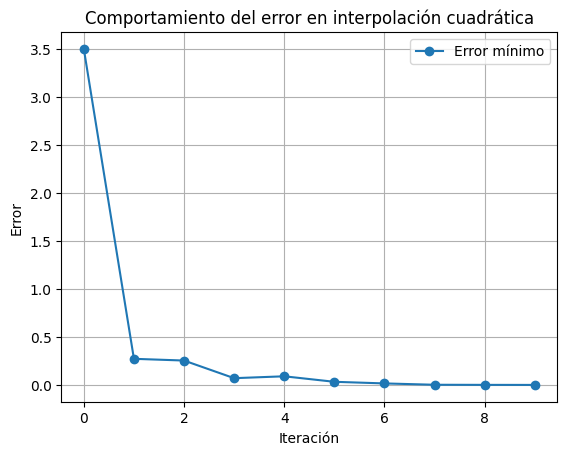

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Función objetivo
def f(x):
  #return 3*x**2 - 120*x + 100
  return x**3 -2*x**2


def interpolacion_cuadratica(f, x0, x1, x2, error, method = 'minimize'):
    results = pd.DataFrame(columns=['x0', 'x1', 'x2', 'x3', 'f(x3)', 
                                     'error_x0', 'error_x1', 'error_x2', 'error_min'])
    iteraciones = 0
    x3 = None

    while True:
        f0, f1, f2 = f(x0), f(x1), f(x2)

        # Fórmula de interpolación cuadrática
        num = (f0 * (x1**2 - x2**2) + f1 * (x2**2 - x0**2) + f2 * (x0**2 - x1**2))
        den = (2 * (f0*(x1 - x2) + f1*(x2 - x0) + f2*(x0 - x1)))

        if den == 0:
            print("Error: denominador cero")
            break

        x3 = num / den
        f3 = f(x3)

        # Errores individuales y el mínimo
        error_x0 = abs(x3 - x0)
        error_x1 = abs(x3 - x1)
        error_x2 = abs(x3 - x2)
        error_min = min(error_x0, error_x1, error_x2)

        # Guardar datos en el DataFrame
        results.loc[len(results)] = [x0, x1, x2, x3, f3, error_x0, error_x1, error_x2, error_min]

        # Verificar condición de parada
        if error_min < error:
            break

        # Actualizar los puntos
        if method == 'maximize':  # Mantener el valor más alto
            if f3 > f1:
                x0 = x1
                x1 = x3
            else:
                x2 = x1
                x1 = x3
        elif method == 'minimize':  # Mantener el valor más bajo
            if f3 < f1:
                x0 = x1
                x1 = x3
            else:
                x2 = x1
                x1 = x3
        else:
            raise ValueError("Método no reconocido")

        iteraciones += 1

    return x3, f3, iteraciones, results


# --- Ejemplo ---
x0 = -1
x1 = 1.1
x2 = 2
error = 0.0001

method = 'minimize'

max_x, max_fx, iteraciones, df = interpolacion_cuadratica(f, x0, x1, x2, error, method=method)

if method == 'minimize':
    print("El mínimo está en x =", max_x)
    print("f(x) mínimo =", max_fx)
else:
    print("El máximo está en x =", max_x)
    print("f(x) máximo =", max_fx)

print("Iteraciones realizadas:", iteraciones)
print("\nTabla de iteraciones:")
print(df)

# # Graficar el error mínimo
plt.plot(df['error_min'], marker='o', label='Error mínimo')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.title('Comportamiento del error en interpolación cuadrática')
plt.grid(True)
plt.legend()
plt.show()


# Newton-Raphson

In [82]:
import sympy as sp

def f(x):
    # Define the function: f(x) = sin(x)
    f = sp.sin(x)

    return f

def newton_raphson(f, df, x0, error, max_iter=100):
    results = pd.DataFrame(columns=['Iteración', 'x', 'f(x)', "f'(x)", 'Error'])
    iteraciones = 0
    x = x0
    error_actual = float('inf')

    while error_actual > error and iteraciones < max_iter:
        fx = f(x)
        dfx = df(x)

        if dfx == 0:
            print("Derivada cero. No se puede continuar.")
            break

        x_new = x - fx / dfx
        error_actual = abs(x_new - x)

        results.loc[len(results)] = [iteraciones, x, fx, dfx, error_actual]

        x = x_new
        iteraciones += 1

    return x, iteraciones, results

# Define the function and its derivative
x = sp.Symbol('x')
f_sym = f(x)
df_sym = sp.diff(f_sym, x)

x, iteraciones, df = newton_raphson(sp.lambdify(x, f_sym), sp.lambdify(x, df_sym), x0=2, error=0.0001)
print("La raíz es:", x)
print("Número de iteraciones:", iteraciones)
print(df)

La raíz es: 3.141592653589793
Número de iteraciones: 6
   Iteración         x          f(x)     f'(x)         Error
0        0.0  2.000000  9.092974e-01 -0.416147  2.185040e+00
1        1.0  4.185040 -8.641441e-01 -0.503244  1.717146e+00
2        2.0  2.467894  6.238811e-01 -0.781519  7.982926e-01
3        3.0  3.266186 -1.242715e-01 -0.992248  1.252424e-01
4        4.0  3.140944  6.487412e-04 -1.000000  6.487414e-04
5        5.0  3.141593 -9.101108e-11 -1.000000  9.101120e-11


# Newton

In [ ]:
import sympy as sp
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

# Definir la función simbólica
x = sp.Symbol('x')
f_sym = sp.sin(x) - x + 2
df_sym = sp.diff(f_sym, x)
ddf_sym = sp.diff(df_sym, x)

# Funciones numéricas
f_num = sp.lambdify(x, f_sym, 'numpy')
df_num = sp.lambdify(x, df_sym, 'numpy')
ddf_num = sp.lambdify(x, ddf_sym, 'numpy')

def newton(df, ddf, x0, error=1e-5, max_iter=100):
    """Método de Newton para encontrar un punto crítico"""
    x = x0
    for _ in range(max_iter):
        dfx = df(x)
        ddfx = ddf(x)
        if ddfx == 0:
            return None  # evitar división entre cero
        x_new = x - dfx/ddfx
        if abs(x_new - x) < error:
            return x_new
        x = x_new
    return None

def evaluar_punto(x0):
    """Corre Newton desde x0 y devuelve (x*, f(x*)) si converge"""
    x_star = newton(df_num, ddf_num, x0)
    if x_star is None:
        return None
    return (float(x_star), float(f_num(x_star)))

def buscar_extremos(x0, vecinos=5, method='maximize'):
    """Busca máximos y mínimos desde x0 y puntos vecinos"""
    puntos_iniciales = [x0 + i for i in range(-vecinos, vecinos+1) if i != 0]
    puntos_iniciales.append(x0)

    resultados = []
    with ThreadPoolExecutor() as executor:
        for r in executor.map(evaluar_punto, puntos_iniciales):
            if r is not None:
                resultados.append(r)

    # Eliminar duplicados aproximados
    resultados_unicos = {}
    for xi, fi in resultados:
        xi_red = round(xi, 5)
        if xi_red not in resultados_unicos:
            resultados_unicos[xi_red] = fi

    # Ordenar por f(x)
    resultados_ordenados = sorted(resultados_unicos.items(), key=lambda t: t[1])

    if method == 'maximize':
        resultado = resultados_ordenados[-1]
    elif method == 'minimize':
        resultado = resultados_ordenados[0]
    else:
        raise ValueError("Método no reconocido")

    return resultado


# Ejemplo desde x0 = 4
xi = 4
method = 'maximize'
extremos = buscar_extremos(xi, vecinos=5, method=method)

if method == 'maximize':
    print("Máximo global aproximado: x =", str(extremos[0]), "f(x) =", str(extremos[1]))
else:
    print("Mínimo global aproximado: x =", str(extremos[0]), "f(x) =", str(extremos[1]))


Mínimo global aproximado: x = 6.28318 f(x) = -4.283185307179586


# Busqueda aleatoria

El mínimo está en x = 1.9925, y = 2.9652
f(x,y) mínimo = -27.5765

Tabla de iteraciones (últimas 10):
         iter         x         y    f(x,y)
9990   9991.0 -1.439422  2.667423  0.526923
9991   9992.0  0.135164  2.164321 -3.276741
9992   9993.0  0.374727  1.003897 -1.411857
9993   9994.0 -0.495201  1.390935  0.838574
9994   9995.0 -1.971685  2.264049  0.262716
9995   9996.0  0.707097  1.755471 -5.515852
9996   9997.0 -1.312660  1.662850  1.129801
9997   9998.0 -0.729986  2.526438 -0.503697
9998   9999.0 -1.872289  2.144790  0.437355
9999  10000.0 -1.935929  2.442957  0.373988


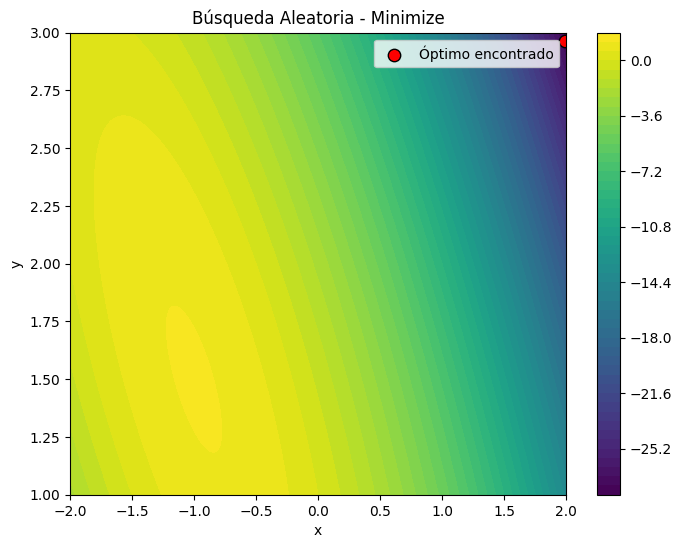

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo
def f(x, y):
    return y - x - 2*x**2 - 2*x*y - y**2

def busqueda_aleatoria(f, xl, xu, yl, yu, n_iter, method="maximize"):
    results = pd.DataFrame(columns=["iter", "x", "y", "f(x,y)"])
    best_f = None
    best_x, best_y = None, None

    for i in range(1, n_iter+1):
        # Generar valores aleatorios dentro del rango
        x = xl + (xu - xl) * np.random.rand()
        y = yl + (yu - yl) * np.random.rand()
        val = f(x, y)

        # Guardar resultados
        results.loc[len(results)] = [i, x, y, val]

        # Verificar mejor valor según el método
        if best_f is None:
            best_f, best_x, best_y = val, x, y
        else:
            if method == "maximize" and val > best_f:
                best_f, best_x, best_y = val, x, y
            elif method == "minimize" and val < best_f:
                best_f, best_x, best_y = val, x, y

    return best_x, best_y, best_f, results


# --- Ejemplo ---
xl, xu = -2, 2
yl, yu = 1, 3
n_iter = 10000

# Cambiar entre 'maximize' o 'minimize'
method = "minimize"

best_x, best_y, best_f, df = busqueda_aleatoria(f, xl, xu, yl, yu, n_iter, method)

if method == "maximize":
    print(f"El máximo está en x = {best_x:.4f}, y = {best_y:.4f}")
    print(f"f(x,y) máximo = {best_f:.4f}")
else:
    print(f"El mínimo está en x = {best_x:.4f}, y = {best_y:.4f}")
    print(f"f(x,y) mínimo = {best_f:.4f}")

print("\nTabla de iteraciones (últimas 10):")
print(df.tail(10))


# --- Gráfica ---
X = np.linspace(xl, xu, 200)
Y = np.linspace(yl, yu, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

plt.figure(figsize=(8,6))
cp = plt.contourf(X, Y, Z, levels=50, cmap="viridis")
plt.colorbar(cp)
plt.scatter(best_x, best_y, color="red", s=80, edgecolors="black", label="Óptimo encontrado")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Búsqueda Aleatoria - {method.capitalize()}")
plt.legend()
plt.show()
